Seattle Drug Geography


In [318]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline

In [319]:
# pull in data
SeattleDrug=pd.read_csv(os.getcwd()+'/SeattleDrug.csv')

#See what kind of data set and categories exist
print SeattleDrug.shape
SeattleDrug.head(10)
 

(15313, 19)


,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,1109827,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,NaN,4XX BLOCK OF PINE ST,M,M2,8100.2001,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014
1,453925,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,NaN,4XX BLOCK OF PINE ST,M,M2,8100.2000,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014
2,106121,2013387978,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,NaN,10XX BLOCK OF OCCIDENTAL AV S,K,K2,9300.2031,-122.333269,47.593836,"(47.5938359, -122.333268691)",10,2013
3,857239,2013387978,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,NaN,10XX BLOCK OF OCCIDENTAL AV S,K,K3,9300.2002,-122.333269,47.593836,"(47.5938359, -122.333268687)",10,2013
4,109156,2013366944,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/9/13 16:08,10/9/13 11:00,NaN,14XX BLOCK OF NW 65 ST,J,J2,3300.1012,-122.374978,47.675949,"(47.675948636, -122.374978091)",10,2013
5,845984,2013365722,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/9/13 16:08,10/9/13 11:00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,"(0.0, 0.0)",10,2013
6,919156,2013366944,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/9/13 16:08,10/9/13 11:00,NaN,14XX BLOCK OF NW 65 ST,B,B3,3300.6011,-122.374978,47.675949,"(47.675948635, -122.374978093)",10,2013
7,147864,201376590,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,3/6/13 12:49,3/6/13 12:49,NaN,73XX BLOCK OF RAINIER AV S,S,S2,11102.4006,-122.270155,47.536444,"(47.536443871, -122.270154705)",3,2013
8,836650,201376590,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,3/6/13 12:49,3/6/13 12:49,NaN,73XX BLOCK OF RAINIER AV S,S,S2,11102.4006,-122.270155,47.536444,"(47.536443871, -122.270154704)",3,2013
9,347508,2009300507,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,8/25/09 16:48,8/25/09 15:10,NaN,8 AV / PIKE ST,M,M2,8200.1010,-122.332248,47.612070,"(47.61207009, -122.332248067)",8,2009


In [320]:

# Fill in the NaN data with '0' as a placeholder
SeattleDrug.fillna('-1', inplace=True)
SeattleDrug = SeattleDrug[SeattleDrug['Zone/Beat'] != '-1']

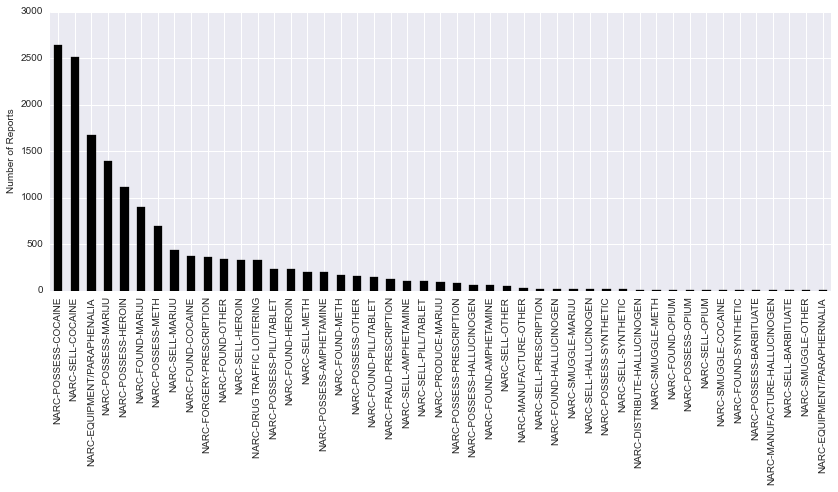

In [321]:
#Sort the crimes by offense type and by date

types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')
plt.xlabel('')
plt.ylabel('Number of Reports', fontsize=10)

In [322]:
beat2neighborhood_df = pd.read_csv(os.getcwd()+'/SeattleZoneBeats.csv')
beat2neighborhood = {}
for i, row in beat2neighborhood_df.iterrows():
    zone = row['ZoneBeat']
    ne = row['Neighborhood']
    beat2neighborhood[zone] = ne
neighborhoods = [beat2neighborhood[beat] for beat in SeattleDrug['Zone/Beat']]
series = pd.Series(neighborhoods)
SeattleDrug['Neighborhood'] = series
SeattleDrug.head(10)

,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Neighborhood
0,1109827,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,4XX BLOCK OF PINE ST,M,M2,8100.2,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,Downtown
1,453925,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,4XX BLOCK OF PINE ST,M,M2,8100.2,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,Downtown
2,106121,2013387978,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,-1,10XX BLOCK OF OCCIDENTAL AV S,K,K2,9300.203,-122.333269,47.593836,"(47.5938359, -122.333268691)",10,2013,Pioneer Square/SODO
3,857239,2013387978,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,-1,10XX BLOCK OF OCCIDENTAL AV S,K,K3,9300.2,-122.333269,47.593836,"(47.5938359, -122.333268687)",10,2013,International District
4,109156,2013366944,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/9/13 16:08,10/9/13 11:00,-1,14XX BLOCK OF NW 65 ST,J,J2,3300.101,-122.374978,47.675949,"(47.675948636, -122.374978091)",10,2013,Ballard
6,919156,2013366944,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,10/9/13 16:08,10/9/13 11:00,-1,14XX BLOCK OF NW 65 ST,B,B3,3300.601,-122.374978,47.675949,"(47.675948635, -122.374978093)",10,2013,Rainier Valley/Rainier Beach
7,147864,201376590,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,3/6/13 12:49,3/6/13 12:49,-1,73XX BLOCK OF RAINIER AV S,S,S2,11102.4,-122.270155,47.536444,"(47.536443871, -122.270154705)",3,2013,Rainier Valley/Rainier Beach
8,836650,201376590,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,3/6/13 12:49,3/6/13 12:49,-1,73XX BLOCK OF RAINIER AV S,S,S2,11102.4,-122.270155,47.536444,"(47.536443871, -122.270154704)",3,2013,Downtown
9,347508,2009300507,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,8/25/09 16:48,8/25/09 15:10,-1,8 AV / PIKE ST,M,M2,8200.101,-122.332248,47.612070,"(47.61207009, -122.332248067)",8,2009,Beacon Hill
10,376226,200985540,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,3/12/09 3:12,3/12/09 2:02,-1,26 AV S / S FERDINAND ST,R,R1,10401.2,-122.299172,47.558519,"(47.558519457, -122.299171746)",3,2009,SODO


In [323]:
#There are a lot of different categories of crimes. How many different types of narcotics crimes are there?
print types.shape

(47,)


In [324]:
#There are many categories that fall under one superset, so let's recategorize the data 

SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('COCAINE'),'Offense Type']='COKE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('MARIJU'),'Offense Type']='WEED'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('METH'),'Offense Type']='METH'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('HEROIN'),'Offense Type']='HEROIN'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OPIUM'),'Offense Type']='OPIUM'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('HALLUCINOGEN'),'Offense Type']='HALLUCINOGEN'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PILL'),'Offense Type']='PILLS'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('SYNTHETIC'),'Offense Type']='SYNTHETIC'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PRESCRIPTION'),'Offense Type']='PRESCRIPTION'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OTHER'),'Offense Type']='OTHER'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OPIUM'),'Offense Type']='OPIUM'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('BARBITUATE'),'Offense Type']='BARBITUATE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PARAPHE'),'Offense Type']='PARAPHENALIA'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('AMPHETAMINE'),'Offense Type']='AMPHETAMINE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('DRUG TRAFFIC LOITERING'),'Offense Type']='DRUG TRAFFIC LOITERING'

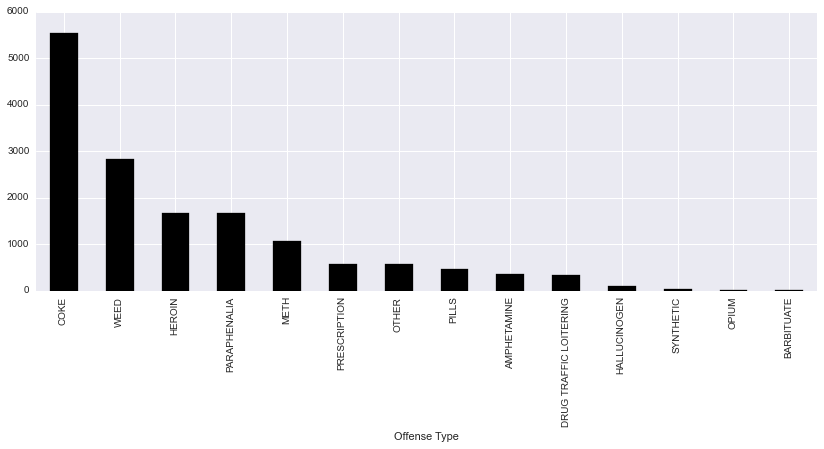

In [325]:
types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')

In [326]:
SeattleDrug.index=pd.DatetimeIndex(SeattleDrug['Date Reported'])
SeattleDrug['date']=SeattleDrug.index.date
SeattleDrug['year']=SeattleDrug.index.year
SeattleDrug['month']=SeattleDrug.index.month

coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
weed_crime=SeattleDrug[SeattleDrug['Offense Type']=='WEED']
meth_crime=SeattleDrug[SeattleDrug['Offense Type']=='METH']
her_crime=SeattleDrug[SeattleDrug['Offense Type']=='HEROIN']
para_crime=SeattleDrug[SeattleDrug['Offense Type']=='PARAPHENALIA']
prescrip_crime=SeattleDrug[SeattleDrug['Offense Type']=='PRESCRIPTION']
other_crime=SeattleDrug[SeattleDrug['Offense Type']=='OTHER']
pill_crime=SeattleDrug[SeattleDrug['Offense Type']=='PILLS']
amph_crime=SeattleDrug[SeattleDrug['Offense Type']=='AMPHETAMINE']
traf_crime=SeattleDrug[SeattleDrug['Offense Type']=='DRUG TRAFFIC LOITERING']
hallu_crime=SeattleDrug[SeattleDrug['Offense Type']=='HALLUCINOGEN']
synth_crime=SeattleDrug[SeattleDrug['Offense Type']=='SYNTHETIC']
opi_crime=SeattleDrug[SeattleDrug['Offense Type']=='OPIUM']
barb_crime=SeattleDrug[SeattleDrug['Offense Type']=='BARBITUATE']

Let's categorize these drug types by districts.

Precint de-coder:
    
http://www.seattle.gov/police/maps/precinct_map.htm

UnitSecondLetter	District/Unit
A	 SPECIAL EVENTS
B	 BALLARD SECTOR (NORTH)
C	 CAPITAL HILL SECTOR (EAST)
D	 DENNY WAY SECTOR (WEST)
E	 EASTLAKE SECTOR (EAST
F	 FLATLANDS SECTOR (SOUTH)
G	 GARFIELD SECTOR (EAST)
H	 CAPITOL HILL? SECTOR (EAST)
I	 SPECIAL OPERATIONS UNITS (WEST) SEATTLE CENTER
J	 SPECIAL EVENTS
K	 KING STREET SECTOR (WEST)
L	 LAKE CITY SECTOR (NORTH)
M	 METROPOLITAN ? SECTOR (WEST)
N	 NORTH SECTOR (NORTH)
O	 SPECIAL EVENTS
P	 PARKING ENFORCEMENT UNITS
Q	 QUEEN ANNE SECTOR (WEST)
R	 RAINIER VALLEY SECTOR (SOUTH)
S	 SOUTH SECTOR (SOUTH)
T	 TRAFFIC ENFORCEMENT UNITS
U	 UNIVERSITY SECTOR (NORTH)
V	 OFF DUTY OFFICERS (FOLLOWED BY THEIR SERIAL NUMBER)
W	 WEST SEATTLE SECTOR (SOUTH)
Y	 SPECIAL EVENTS
Z	 SPECIAL PATROL UNIT (ERT)

In [327]:


def types_districts(SeattleDrug, per):
    
    # Group by crime type and district 
    hoods_per_type=SeattleDrug.groupby('Offense Type')['Neighborhood'].value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum.sort(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum.sort()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=types_districts(SeattleDrug, 0)



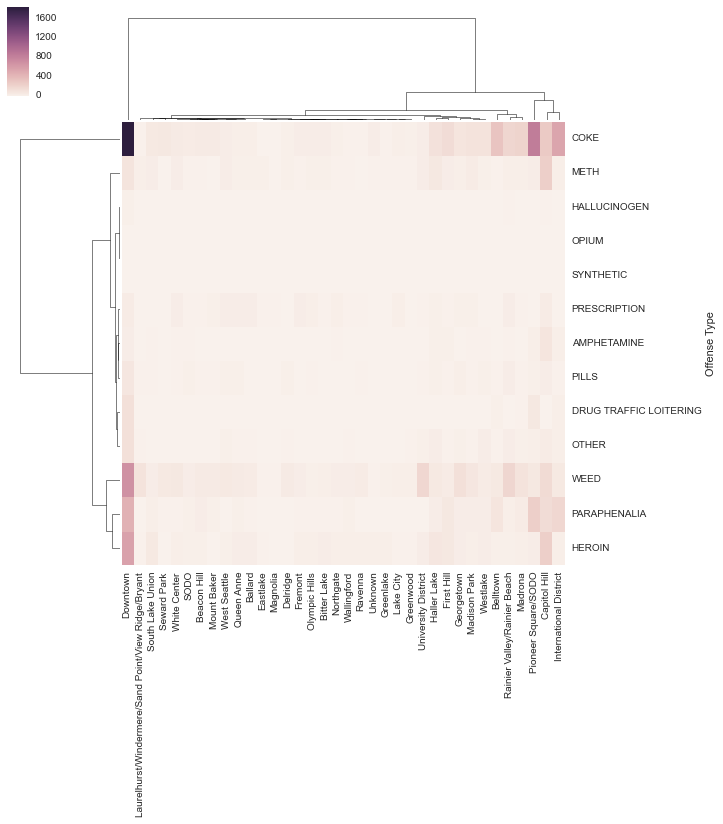

In [328]:

sns.clustermap(t) 


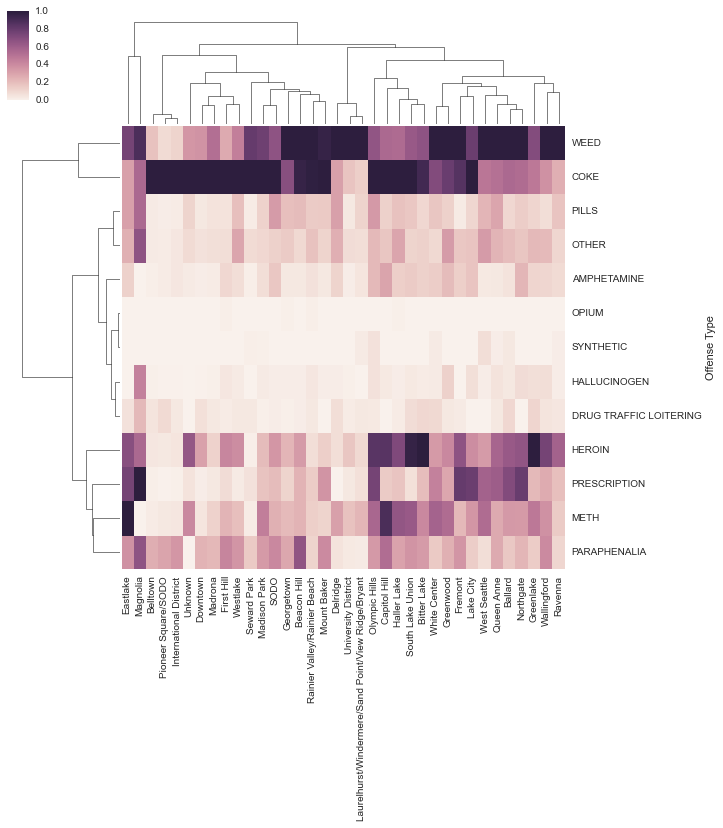

In [329]:
sns.clustermap(t,standard_scale=1) 

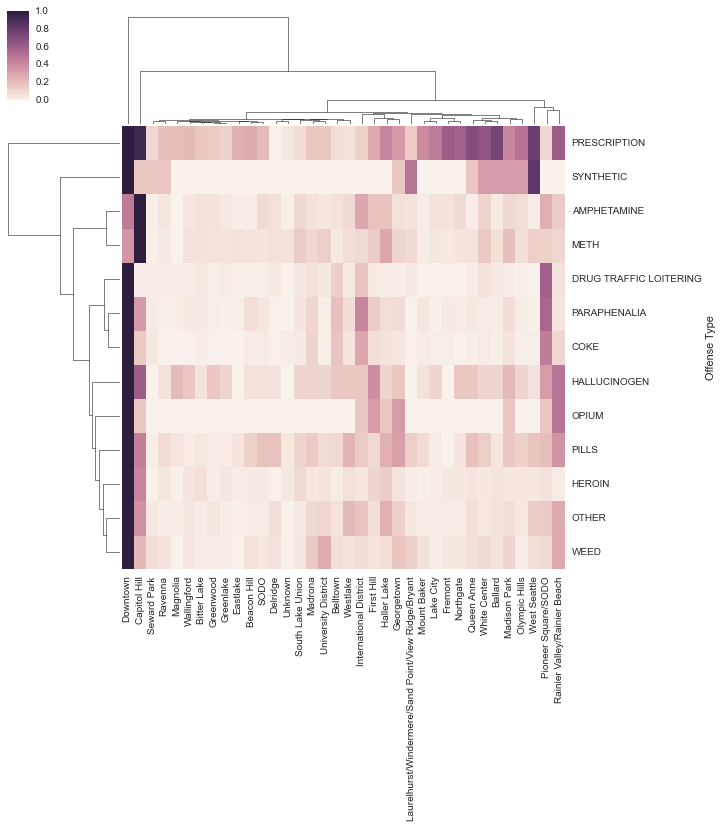

In [330]:
sns.clustermap(t,standard_scale=0) 

In [335]:
# Bin crime by 30 day window
a = SeattleDrug['Date Reported'][0]
# import datetime
from dateutil.parser import parse
months = []
days = []
years = []
month_years = []
for date in SeattleDrug['Date Reported']:
    dt = parse(date)
    months.append(dt.month)
    days.append(dt.day)
    years.append(dt.year)
    month_years.append(dt.strftime('%b %Y'))
SeattleDrug['Month'] = months
SeattleDrug['Day'] = days
SeattleDrug['Year'] = years
SeattleDrug['MonthYear'] = month_years


    
# Default
district='All'



In [332]:
def timeseries(dat,per):
    ''' Category grouped by month '''
    
    # Group by crime type and district 
    cat_per_time=dat.groupby('MonthYear')['Offense Type'].value_counts(sort=True)
    t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
    crime_sum=t.sum(axis=0)
    crime_sum.sort()  # TODO: Don't sort time alphabetically
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t[ix.index]
    return t
    
t_all=timeseries(SeattleDrug,0)
print t_all.columns


Index([u'OPIUM', u'SYNTHETIC', u'HALLUCINOGEN', u'DRUG TRAFFIC LOITERING',
       u'AMPHETAMINE', u'PILLS', u'OTHER', u'PRESCRIPTION', u'METH',
       u'PARAPHENALIA', u'HEROIN', u'WEED', u'COKE'],
      dtype='object')


In [333]:
# Lets use real dates for plotting
#days_from_start=pd.Series(t_all.index*30).astype('timedelta64[D]')
#dates_for_plot=date.min()+days_from_start
#time_labels=dates_for_plot.map(lambda x: str(x.year)+'-'+str(x.month))

/Users/eyi/Dropbox/Projects/dataviz/Seattle_Crime


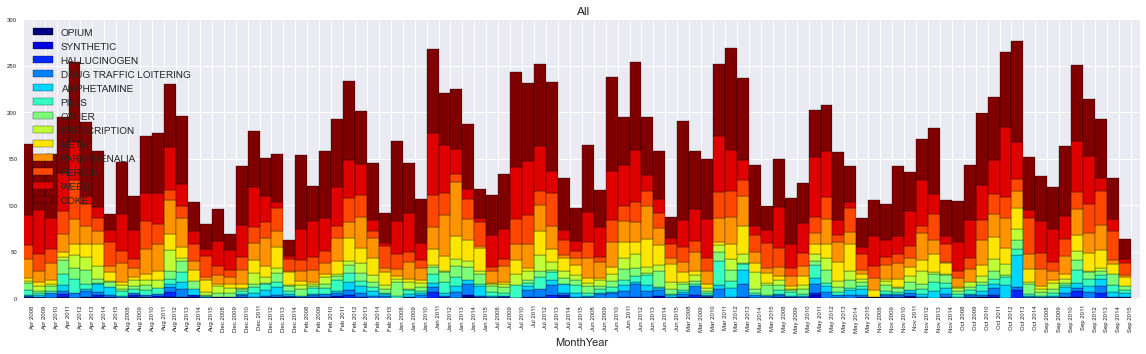

In [336]:
def drug_analysis(t,district,plot):
    #drugs=t[u'OPIUM', u'SYNTHETIC', u'HALLUCINOGEN', u'DRUG TRAFFIC LOITERING',
     #  u'AMPHETAMINE', u'PILLS', u'OTHER', u'PRESCRIPTION', u'METH',
    #  u'PARAPHENALIA', u'HEROIN', u'WEED', u'COKE']
    if plot:
        #t.index=[int(i) for i in range(t.shape[0])]
        
        colors = plt.cm.jet(np.linspace(0, 1, t.shape[1]))
        t.plot(kind='bar', stacked=True, figsize=(20,5), color=colors, width=1, title=district, fontsize=6)
    return t

drug_df_all=drug_analysis(t_all,district,True)
print os.getcwd()

In [ ]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

In [ ]:
print list(set(coke_crime['Year']))

In [ ]:
crime_by_year=SeattleDrug.groupby(['Year','Offense Type']).size().unstack().fillna(0)
crime_by_year[['COKE', 'WEED', 'HEROIN','METH']].plot(figsize=(14,4),kind='bar')

In [ ]:
coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
coke_crime_by_day=coke_crime.groupby('month').size()
coke_crime_by_day.plot(figsize=(14,4),color='k',style='--o')

In [ ]:
coke_pairs=coke_crime[['Latitude','Longitude']]
weed_pairs=weed_crime[['Latitude','Longitude']]
meth_pairs=meth_crime[['Latitude','Longitude']]
her_pairs=her_crime[['Latitude','Longitude']]

In [ ]:
center = [coke_pairs.Latitude.median(),coke_pairs.Longitude.median()]
df_map = folium.Map(location=center,tiles='Mapbox',zoom_start=12,API_key='cray.16710dba',width=1060,height=1000)
for pair in coke_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'red', fill_color = 'red')
for pair in weed_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'green', fill_color = 'green')
for pair in meth_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'blue', fill_color = 'blue')
for pair in her_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .3, fill_opacity=1, line_color = 'yellow', fill_color = 'yellow')

In [ ]:
df_map.create_map()
embed_map(df_map)